In [5]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import kaggle as kg # type: ignore
import scipy.stats as s # type: ignore
import os

import splitfolders # type: ignore


import cv2 # type: ignore
from sklearn.utils.multiclass import unique_labels # type: ignore
import matplotlib.image as mpimg # type: ignore
import itertools
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import confusion_matrix # type: ignore
from keras import Sequential # type: ignore
from keras.models import load_model # type: ignore
from keras.applications.vgg16 import VGG16 #For Transfer Learning # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.optimizers import SGD,Adam # type: ignore
from keras.callbacks import ReduceLROnPlateau # type: ignore
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore


In [6]:
import hashlib
from collections import defaultdict

In [7]:
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
import shutil 

In [9]:
kg.api.authenticate()

In [ ]:
# kg.api.dataset_download_files(dataset="nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone", path="./dataset",unzip=True)

Dataset URL: https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone


In [ ]:
# def get_file_hash(file_path):
#     """Generate MD5 hash for a file."""
#     hasher = hashlib.md5()
#     with open(file_path, 'rb') as f:
#         buf = f.read()
#         hasher.update(buf)
#     return hasher.hexdigest()

# def remove_duplicates(directory):
#     """Find and remove duplicate images from dataset folders."""
#     hash_map = defaultdict(list)

#     # Walk through all files in the directory
#     for root, _, files in os.walk(directory):  # Make sure 'directory' is correctly passed
#         for file in files:
#             file_path = os.path.join(root, file)

#             # Get file hash
#             file_hash = get_file_hash(file_path)
#             hash_map[file_hash].append(file_path)

#     # Remove duplicate files
#     duplicate_count = 0
#     for file_list in hash_map.values():
#         if len(file_list) > 1:
#             print(f"Duplicate found: Keeping {file_list[0]}, removing {len(file_list)-1} duplicates.")
#             for duplicate in file_list[1:]:  # Keep one, delete others
#                 os.remove(duplicate)
#                 duplicate_count += 1

#     print(f"\nTotal duplicates removed: {duplicate_count}")

# # ✅ Pass the correct dataset path
# dataset_path = "/home/demon/Projects/dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"
# remove_duplicates(dataset_path)  # ✅ Make sure to call the function with a valid argument



Total duplicates removed: 0


In [10]:
data = pd.read_csv("dataset/kidneyData.csv")

In [11]:
data

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
...,...,...,...,...,...,...
12441,12441,Cyst- (2522),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12442,12442,Cyst- (2627),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12443,12443,Cyst- (972),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12444,12444,Cyst- (2323),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst


In [12]:
data.info()
# data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12446 entries, 0 to 12445
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12446 non-null  int64 
 1   image_id    12446 non-null  object
 2   path        12446 non-null  object
 3   diag        12446 non-null  object
 4   target      12446 non-null  int64 
 5   Class       12446 non-null  object
dtypes: int64(2), object(4)
memory usage: 583.5+ KB


In [13]:
data['Class'].unique()
# data.columns

array(['Tumor', 'Normal', 'Stone', 'Cyst'], dtype=object)

In [14]:
kidney_classes = data['Class'].value_counts()
kidney_classes

Class
Normal    5077
Cyst      3709
Tumor     2283
Stone     1377
Name: count, dtype: int64

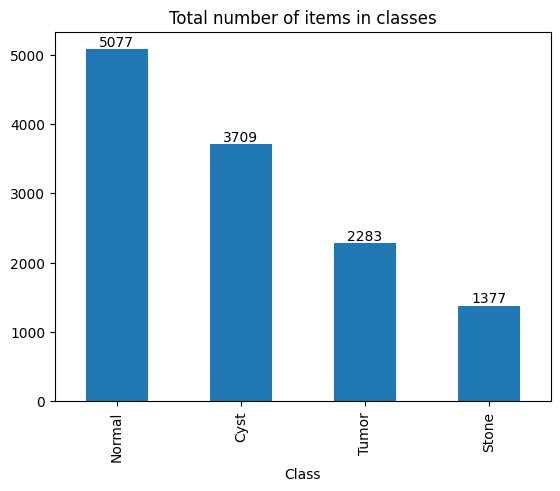

In [15]:
plot_bar = kidney_classes.plot.bar(title='Total number of items in classes')
plot_bar.bar_label(plot_bar.containers[0]);

In [16]:
pip install split_folders # type: ignore

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# splitfolders.ratio(
#     "/home/demon/Projects/dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
#     output="dataset", 
#     seed=1337, 
#     ratio=(.8, .1, .1), 
#     group_prefix=None
# )

Copying files: 0 files [00:00, ? files/s]

Copying files: 11929 files [00:02, 4146.13 files/s]


In [13]:
channels=3
batch_size=25
test_batch_size=32 
test_steps=1
train_path = './dataset/train'
test_path = './dataset/test'
val_path = './dataset/val'

def scalar(img):    
    return img  # EfficientNet expects pixelsin range 0 to 255 so no scaling is required

train_gen=ImageDataGenerator(preprocessing_function=scalar, horizontal_flip=True)
test_gen=ImageDataGenerator(preprocessing_function=scalar)
train_generator=train_gen.flow_from_directory( directory=train_path , target_size=(224,224), class_mode='categorical',
                                     shuffle=True, batch_size=batch_size)

test_generator=test_gen.flow_from_directory( directory=test_path, target_size=(224,224), class_mode='categorical',
                                     shuffle=False, batch_size=test_batch_size)

valid_generator=test_gen.flow_from_directory( directory=val_path, target_size=(224,224), class_mode='categorical',
                                     shuffle=True, batch_size=batch_size)

classes=list(train_generator.class_indices.keys())
class_count=len(classes)
train_steps=int(np.ceil(len(train_generator.labels)/batch_size))

Found 9542 images belonging to 4 classes.
Found 1195 images belonging to 4 classes.
Found 1192 images belonging to 4 classes.


In [15]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU before importing TensorFlow

import tensorflow as tf # type: ignore
print("Available devices:", tf.config.list_physical_devices())


Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [16]:
base_model = VGG16(include_top = False, input_shape = (224,224,3), classes = 38)
model= Sequential()
model.add(base_model) 
model.add(Flatten()) 

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))                                                    #DENSE LAYER PROBLEM
model.add(Dense(128,activation=('relu')))
model.add(Dense(4,activation=('softmax'))) 


/home/demon/Projects/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,095,364 (156.77 MB)

 Trainable params: 41,095,364 (156.77 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
batch_size= 1218
epochs=15
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False) 
adam=Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

/home/demon/Projects/.venv/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [21]:
history = model.fit(train_generator,epochs = 10, validation_data = valid_generator, verbose = 1)

Epoch 1/10


/home/demon/Projects/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


382/382 ━━━━━━━━━━━━━━━━━━━━ 30885s 81s/step - accuracy: 0.4969 - loss: 1.4438 - val_accuracy: 0.7089 - val_loss: 0.7583
Epoch 2/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 61779s 162s/step - accuracy: 0.7482 - loss: 0.6663 - val_accuracy: 0.7987 - val_loss: 0.4990
Epoch 3/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 7328s 19s/step - accuracy: 0.8974 - loss: 0.2731 - val_accuracy: 0.9824 - val_loss: 0.0606
Epoch 4/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 5543s 15s/step - accuracy: 0.9649 - loss: 0.1033 - val_accuracy: 0.9924 - val_loss: 0.0235
Epoch 5/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 4922s 13s/step - accuracy: 0.9850 - loss: 0.0501 - val_accuracy: 0.9891 - val_loss: 0.0317
Epoch 6/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 5245s 14s/step - accuracy: 0.9916 - loss: 0.0268 - val_accuracy: 0.9975 - val_loss: 0.0048
Epoch 7/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 5362s 14s/step - accuracy: 0.9981 - loss: 0.0054 - val_accuracy: 0.9698 - val_loss: 0.0923
Epoch 8/10
382/382 ━━━━━━━━━━━━━━━━━━━━ 5210s 14s/step - accuracy: 0.9905 - loss: 0.0303 - 

In [2]:
def print_info( test_gen, preds, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names     
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)         
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index)  
          
    y_true= np.array(labels)        
    y_pred=np.array(y_pred)
    if len(classes)<= 40:
        # create a confusion matrix 
        cm = confusion_matrix(y_true, y_pred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes) # type: ignore
    print("Classification Report:\n----------------------\n", clr)

In [ ]:
sns.set_style('darkgrid')
p = model.predict(test_generator)
print_info( test_generator, p, r'./', 'kidney')  

NameError: name 'model' is not defined

In [ ]:
model.evaluate(test_generator)

In [ ]:
shutil.rmtree('./dataset')

In [ ]:
history.params
history.history.keys()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
path = input("Enter Image path: ")

In [ ]:
!pip uninstall opencv-python -y

In [ ]:
!pip install opencv-contrib-python==3.4.3.18